## INTRODUCTION
The project will use speech data and their transcriptions to train a speech to text model. The goal is to develop a model that can collect data through speech. Five deep learning models will be compared and the best model will be used in the prediction of text from speech input.

## PREPROCESSING
The first step will be to preprocess the data and generate spectrograms from it. the resulting spectrogram from one of the audios is displayed below. The spectograms will be converted to Mel Frequency Ceptral coefficients(MFCC). The final models will allow the use of the dimensions of either a spectrogram or MFCC. MFCCs improve on the spectrogram by first taking into account the fact that humans passive speech on a logarithmic scale and the compresses the features and extracts the most common frequency.

In [19]:
from data_generator import vis_train_features

Visualization

In [20]:
# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 8000 total training examples.


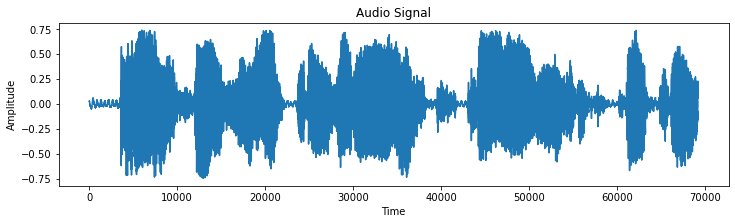

**Shape of Audio Signal** : (69237,)

**Transcript** : rais wa tanzania jakaya mrisho kikwete

In [21]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

Acoustic Feature Generation
The dataset will be transformed from raw audio to images.

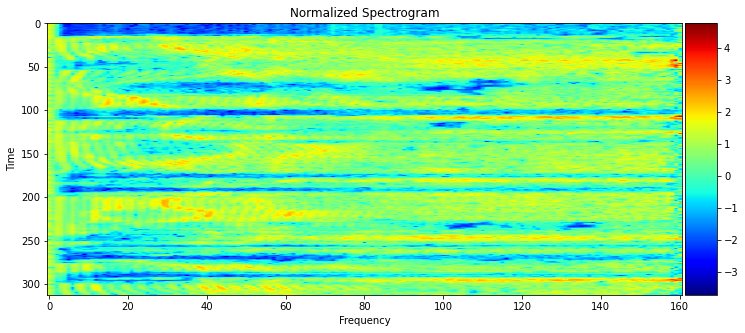

**Shape of Spectrogram** : (313, 161)

In [22]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

MFCC

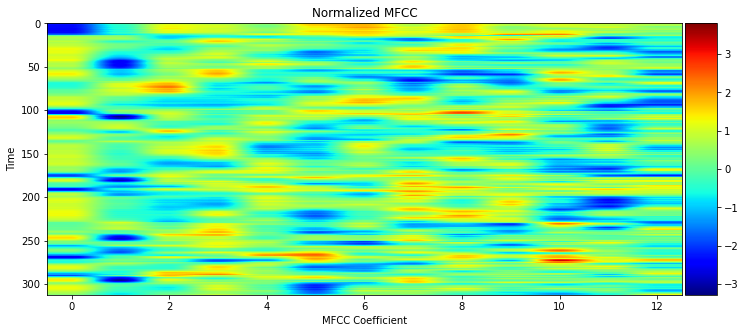

**Shape of MFCC** : (313, 13)

In [23]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

Training with deep learning models

In [2]:
!nvidia-smi

Wed Aug 11 09:26:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   26C    P8    15W /  70W |    102MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## TRAINING
The dimensions extracted from the spectrograms and MFCCs are important for the next step of training with deep learning. We begin with a simple RNN model and add layers to it. The outputs for the models are vectors of the probabilities of a character being spoken. The CTC loss criterion is used to train the model. The CTC automatically maps input features to output features.

In [2]:
# # allocate 50% of GPU memory (if you like, feel free to change this)
# from tensorflow.keras.backend.tensorflow_backend import set_session
# import tensorflow as tf 
# config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# set_session(tf.Session(config=config))

# # watch for any changes in the sample_models module, and reload it automatically
# %load_ext autoreload
# %autoreload 2
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

2021-08-12 06:33:24.713207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-12 06:33:24.713238: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## SIMPLE RNN
The recurrent neural network works by looking at past valuea as well as the information gained from them. The models are good for training data that is sequential like speech and text. For the simple RNN the output of the previuos timestep is fed into the next time step. 

In [8]:
model_0 = simple_rnn_model(input_dim=13)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
rnn (GRU)                    (None, None, 48)          9072      
_________________________________________________________________
softmax (Activation)         (None, None, 48)          0         
Total params: 9,072
Trainable params: 9,072
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            spectrogram=False)

/home/stella_kibika/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
400/400 [==============================] - 307s 758ms/step - loss: 651.2478 - val_loss: 628.7801
Epoch 2/20
400/400 [==============================] - 173s 432ms/step - loss: 643.4217 - val_loss: 627.7467
Epoch 3/20
400/400 [==============================] - 174s 436ms/step - loss: 643.8013 - val_loss: 627.6996
Epoch 4/20
400/400 [==============================] - 174s 436ms/step - loss: 643.8355 - val_loss: 627.6929
Epoch 5/20
400/400 [==============================] - 173s 433ms/step - loss: 643.1719 - val_loss: 627.7633
Epoch 6/20
400/400 [==============================] - 177s 442ms/step - loss: 643.2948 - val_loss: 627.3320
Epoch 7/20
400/400 [==============================] - 181s 452ms/step - loss: 643.2284 - val_loss: 630.1644
Epoch 8/20
400/400 [==============================] - 178s 445ms/step - loss: 642.8240 - val_loss: 627.9649
Epoch 9/20
400/400 [==============================] - 180s 450ms/step - loss: 643.6849 - val_loss: 626.4490
Epoch 10/20
400/400 [=======

The second method takes the simple RNN and add batch nornalization and a time distributed layer to it. The batch normalization allow for faster training while the time distributed layer allow a layer to be applied to each time step independently.

In [2]:
model_1 = rnn_model(input_dim=13, 
                    units=200,
                    activation='relu')

2021-08-11 12:16:51.285258: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-11 12:16:51.311758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-11 12:16:51.312256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-11 12:16:51.312359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-11 12:16:51.312407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.s

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         129000    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 48)          9648      
_________________________________________________________________
softmax (Activation)         (None, None, 48)          0         
Total params: 139,448
Trainable params: 139,048
Non-trainable params: 400
_________________________________________________________________
None


In [3]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=False)

/opt/miniconda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-08-11 12:17:00.661675: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-11 12:17:00.680368: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2500000000 Hz


Epoch 1/20
400/400 [==============================] - 229s 568ms/step - loss: 126.2255 - val_loss: 99.7237
Epoch 2/20
400/400 [==============================] - 228s 569ms/step - loss: 92.1373 - val_loss: 88.2846
Epoch 3/20
400/400 [==============================] - 227s 567ms/step - loss: 87.6927 - val_loss: 87.7036
Epoch 4/20
400/400 [==============================] - 227s 568ms/step - loss: 86.3182 - val_loss: 88.9564
Epoch 5/20
400/400 [==============================] - 226s 565ms/step - loss: 89.5959 - val_loss: 93.7267
Epoch 6/20
400/400 [==============================] - 220s 551ms/step - loss: nan - val_loss: nan
Epoch 7/20
400/400 [==============================] - 211s 527ms/step - loss: nan - val_loss: nan
Epoch 8/20
400/400 [==============================] - 211s 527ms/step - loss: nan - val_loss: nan
Epoch 9/20
400/400 [==============================] - 215s 537ms/step - loss: nan - val_loss: nan
Epoch 10/20
400/400 [==============================] - 213s 532ms/step - loss

The third model adds a convolution layer to the model. The 1D convolution layer is convolved with the first layer of inputs to produce tensor outputs.

In [4]:
model_2 = cnn_rnn_model(input_dim=13, 
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         28800     
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         80200     
_________________________________________________________________
bn_norm (BatchNormalization) (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 48)          9648      
_________________________________________________________________
softmax (Activation)         (None, None, 48)          0   

In [5]:

train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5', 
            spectrogram=False)

Epoch 1/20
400/400 [==============================] - 137s 340ms/step - loss: 109.8604 - val_loss: 94.3779
Epoch 2/20
400/400 [==============================] - 133s 333ms/step - loss: 87.2819 - val_loss: 86.4098
Epoch 3/20
400/400 [==============================] - 133s 332ms/step - loss: 82.7175 - val_loss: 82.4791
Epoch 4/20
400/400 [==============================] - 135s 339ms/step - loss: 80.1744 - val_loss: 82.7604
Epoch 5/20
400/400 [==============================] - 133s 333ms/step - loss: 79.0212 - val_loss: nan
Epoch 6/20
400/400 [==============================] - 132s 331ms/step - loss: 77.3784 - val_loss: nan
Epoch 7/20
400/400 [==============================] - 132s 331ms/step - loss: 76.8256 - val_loss: nan
Epoch 8/20
400/400 [==============================] - 133s 333ms/step - loss: 76.2809 - val_loss: nan
Epoch 9/20
400/400 [==============================] - 133s 332ms/step - loss: 77.7829 - val_loss: nan
Epoch 10/20
400/400 [==============================] - 130s 326ms

In [ ]:
The fourth models adds a second recurrent layer to the second model.

In [2]:
model_3 = deep_rnn_model(input_dim=161,
                         units=200,
                         recur_layers=2)

2021-08-11 15:20:43.371943: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-11 15:20:43.399383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-11 15:20:43.400018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-11 15:20:43.400155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-11 15:20:43.400239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.s

+Layer 1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         72400     
_________________________________________________________________
bn_norm (BatchNormalization) (None, None, 200)         800       
_________________________________________________________________
rnn1 (GRU)                   (None, None, 200)         241200    
_________________________________________________________________
bnorm1 (BatchNormalization)  (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 48)          9648      
_________________________________________________________________
softmax (Activation)         (None, None, 48)       

In [3]:
train_model(input_to_softmax=model_3, 
            pickle_path='model_3.pickle', 
            save_model_path='model_3.h5', 
            spectrogram=True)

/opt/miniconda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-08-11 15:20:54.388468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-11 15:20:54.408358: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2500000000 Hz


Epoch 1/20
400/400 [==============================] - 322s 797ms/step - loss: nan - val_loss: nan
Epoch 2/20
400/400 [==============================] - 305s 761ms/step - loss: nan - val_loss: nan
Epoch 3/20
400/400 [==============================] - 304s 761ms/step - loss: nan - val_loss: nan
Epoch 4/20
400/400 [==============================] - 295s 737ms/step - loss: nan - val_loss: nan
Epoch 5/20
400/400 [==============================] - 307s 768ms/step - loss: nan - val_loss: nan
Epoch 6/20
400/400 [==============================] - 320s 800ms/step - loss: nan - val_loss: nan
Epoch 7/20
400/400 [==============================] - 318s 795ms/step - loss: nan - val_loss: nan
Epoch 8/20
400/400 [==============================] - 265s 661ms/step - loss: nan - val_loss: nan
Epoch 9/20
400/400 [==============================] - 212s 531ms/step - loss: nan - val_loss: nan
Epoch 10/20
400/400 [==============================] - 214s 535ms/step - loss: nan - val_loss: nan
Epoch 11/20
400/400

The bi-directional model looks at both past sequence and future sequence and outputs to the same layer.

In [4]:
model_4 = bidirectional_rnn_model(input_dim=161, 
                                  units=200)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 400)         579200    
_________________________________________________________________
bnorm (BatchNormalization)   (None, None, 400)         1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 48)          19248     
_________________________________________________________________
softmax (Activation)         (None, None, 48)          0         
Total params: 600,048
Trainable params: 599,248
Non-trainable params: 800
_________________________________________________________________
None


In [5]:
train_model(input_to_softmax=model_4, 
            pickle_path='model_4.pickle', 
            save_model_path='model_4.h5', 
            spectrogram=True)

Epoch 1/20
400/400 [==============================] - 345s 853ms/step - loss: 134.7195 - val_loss: 100.5015
Epoch 2/20
400/400 [==============================] - 343s 857ms/step - loss: 89.9933 - val_loss: 88.4612
Epoch 3/20
400/400 [==============================] - 344s 859ms/step - loss: 81.9719 - val_loss: 81.1841
Epoch 4/20
400/400 [==============================] - 343s 856ms/step - loss: 77.9505 - val_loss: 79.9067
Epoch 5/20
400/400 [==============================] - 344s 861ms/step - loss: 75.0255 - val_loss: 79.0675
Epoch 6/20
400/400 [==============================] - 212s 529ms/step - loss: 72.8855 - val_loss: 77.6886
Epoch 7/20
400/400 [==============================] - 206s 515ms/step - loss: 71.2609 - val_loss: 77.0853
Epoch 8/20
400/400 [==============================] - 206s 516ms/step - loss: 70.2114 - val_loss: 78.6876
Epoch 9/20
400/400 [==============================] - 206s 516ms/step - loss: 68.8517 - val_loss: 79.3307
Epoch 10/20
400/400 [=======================

In [7]:
import os
import mlflow
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token: ')
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('Enter your DAGsHub project name: ')

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] 
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')


#   mlflow.log_metric("m1", 2.0)
#   mlflow.log_param("p1", "mlflow-colab")

Enter your DAGsHub username:  Kibika
Enter your DAGsHub access token:  ········································
Enter your DAGsHub project name:  speech-recognition


The loss curves give an idea of the direction in which a model is learning and the loss curve for the five models above are plotted below. Model 4, with a bidirectional layer, appears to have a good learning rate.
https://cs231n.github.io/neural-networks-3/#loss explains the variations in a loss function, for low learning rates the improvement is linear while higher learning rates lead to faster decay.

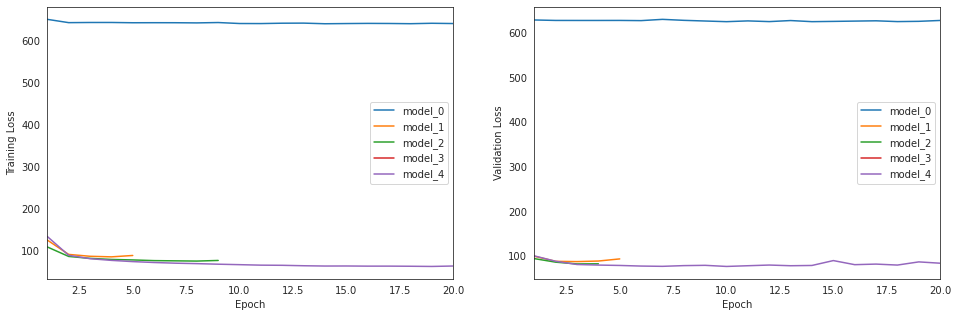

In [19]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import mlflow
import mlflow.tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

with mlflow.start_run(run_name="speech-recognition",nested=True):

    # obtain the paths for the saved model history
    all_pickles = sorted(glob("results/*.pickle"))
    # extract the name of each model
    model_names = [item[8:-7] for item in all_pickles]
    # extract the loss history for each model
    valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
    train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
    # save the number of epochs used to train each model
    num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

    fig = plt.figure(figsize=(16,5))

    # plot the training loss vs. epoch for each model
    ax1 = fig.add_subplot(121)
    for i in range(len(all_pickles)):
        ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
                train_loss[i], label=model_names[i])
    # clean up the plot
    ax1.legend()  
    ax1.set_xlim([1, max(num_epochs)])
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')

    # plot the validation loss vs. epoch for each model
    ax2 = fig.add_subplot(122)
    for i in range(len(all_pickles)):
        ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
                valid_loss[i], label=model_names[i])
    # clean up the plot
    ax2.legend()  
    ax2.set_xlim([1, max(num_epochs)])
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    #     plt.show()
    plt.savefig("loss.png")
    mlflow.log_artifact("loss.png")
    plt.show()

In [ ]:
import IPython
display(IPython.display.IFrame("https://dagshub.com/"+ os.environ['MLFLOW_TRACKING_USERNAME'] 
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + "/experiments/#/",'100%',600))

The model chosen for the speech to text model will be a bidirectional model with two layers because the future context is availabel for speech data and can be exploited to provide a better prediction model.

In [3]:
model_end = final_model(input_dim=13, units=200)

2021-08-12 06:34:35.351981: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-12 06:34:35.381491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 06:34:35.382180: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 06:34:35.382308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-12 06:34:35.382370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.s

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 400)         342400    
_________________________________________________________________
bnorm1 (BatchNormalization)  (None, None, 400)         1600      
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 400)         961600    
_________________________________________________________________
bnorm2 (BatchNormalization)  (None, None, 400)         1600      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 48)          19248     
_________________________________________________________________
softmax (Activation)         (None, None, 48)          0     

In [5]:
import mlflow
mlflow.tensorflow.autolog()
mlflow.log_param("task",2)

2021/08/11 19:30:18 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


In [6]:
train_model(input_to_softmax=model_end, 
            pickle_path='model_end.pickle', 
            save_model_path='model_end.h5', 
            spectrogram=False) # change to False if you would like to use MFCC features

/opt/miniconda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-08-11 19:30:28.193375: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-11 19:30:28.193426: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-08-11 19:30:28.194928: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1611] Profiler found 1 GPUs
2021-08-11 19:30:28.196440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2021-08-11 19:30:28.215516: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcupti.so
202

Epoch 1/20
  1/400 [..............................] - ETA: 1:02:46 - loss: 116.2684

2021-08-11 19:30:40.411143: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-08-11 19:30:40.412075: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


  2/400 [..............................] - ETA: 28:12 - loss: 126.3300  

2021-08-11 19:30:44.290924: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-11 19:30:44.296945: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2021-08-11 19:30:44.752165: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-08-11 19:30:45.708601: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-08-11 19:30:47.876329: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/tmp94chedkx/train/plugins/profile/2021_08_11_19_30_45
2021-08-11 19:30:49.125249: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /tmp/tmp94chedkx/train/plugins/profile/2021_08_11_19_30_45/ip-10-0-1-19.eu-west-1.compute.internal.trace.json.gz
2021-08-11 19:30:49.676719: I tensorflow/core/profiler/rpc/client/save_profi

400/400 [==============================] - 1427s 4s/step - loss: 105.4024 - val_loss: 86.3326
Epoch 2/20
400/400 [==============================] - 834s 2s/step - loss: 85.6253 - val_loss: 80.9258
Epoch 3/20
400/400 [==============================] - 828s 2s/step - loss: 80.2889 - val_loss: 77.3695
Epoch 4/20
400/400 [==============================] - 820s 2s/step - loss: 78.5016 - val_loss: 78.4621
Epoch 5/20
400/400 [==============================] - 911s 2s/step - loss: 76.4700 - val_loss: 76.5767
Epoch 6/20
400/400 [==============================] - 897s 2s/step - loss: 75.4931 - val_loss: 74.2196
Epoch 7/20
400/400 [==============================] - 883s 2s/step - loss: 74.4168 - val_loss: 74.6461
Epoch 8/20
400/400 [==============================] - 934s 2s/step - loss: 73.9225 - val_loss: 75.6368
Epoch 9/20
400/400 [==============================] - 849s 2s/step - loss: 74.0475 - val_loss: 75.5307
Epoch 10/20
400/400 [==============================] - 767s 2s/step - loss: 74.354

2021/08/12 00:10:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/stella_kibika/.local/lib/python3.9/site-packages/mlflow/tensorflow.py:805: UserWarning: Logging to MLflow failed: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_clear_session_function'"


## Prediction

In [4]:
import pickle
from data_generator import AudioGenerator
from IPython.display import Audio
from IPython.display import Markdown, display
import numpy as np
from utils import calc_feat_dim, spectrogram_from_file, text_to_int_sequence,int_sequence_to_text

In [5]:
# Code adapted from https://martin-thoma.com/word-error-rate-calculation/
def wer(r, h):
    """
    Calculation of WER with Levenshtein distance.

    Works only for iterables up to 254 elements (uint8).
    O(nm) time ans space complexity.

    Parameters
    ----------
    r : list
    h : list

    Returns
    -------
    int

    Examples
    --------
    >>> wer("who is there".split(), "is there".split())
    1
    >>> wer("who is there".split(), "".split())
    3
    >>> wer("".split(), "who is there".split())
    3
    """
    # initialisation
    import numpy
    d = numpy.zeros((len(r)+1)*(len(h)+1), dtype=numpy.uint8)
    d = d.reshape((len(r)+1, len(h)+1))
    for i in range(len(r)+1):
        for j in range(len(h)+1):
            if i == 0:
                d[0][j] = j
            elif j == 0:
                d[i][0] = i

    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion    = d[i][j-1] + 1
                deletion     = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)

    return d[len(r)][len(h)]

In [6]:
from data_generator import AudioGenerator
RNG_SEED = 123
model = model_end
model.load_weights('results/model_end.h5')

def make_audio_gen(train_json,
                   valid_json,
                   minibatch_size=20,
                   spectrogram=True,
                   mfcc_dim=13,
                   sort_by_duration=False,
                   max_duration=10.0):
    return AudioGenerator(minibatch_size=minibatch_size, 
        spectrogram=spectrogram, mfcc_dim=mfcc_dim, max_duration=max_duration,
        sort_by_duration=sort_by_duration)


In [7]:
TRAIN_CORPUS = "train_corpus.json"
VALID_CORPUS = "valid_corpus.json"

MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 5
MODEL_NAME = "RNN_model"

################ Reminder MINI_BATCH_SIZE=250 
MINI_BATCH_SIZE = 20

SORT_BY_DURATION=False
MAX_DURATION = 10

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

In [8]:
def predict_raw(data_gen = audio_gen, index = 14, partition = 'train', model = model):
    """ Get a model's decoded predictions
    Params:
        data_gen: Data to run prediction on
        index (int): Example to visualize
        partition (str): Either 'train' or 'validation'
        model (Model): The acoustic model
    """

    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')
        
    prediction = model.predict(np.expand_dims(data_point, axis=0))
    return (audio_path,data_point,transcr,prediction)

In [34]:
def predict(data_gen=audio_gen, index=14, partition = 'train', model=model, verbose=True):
    """ Print a model's decoded predictions
    Params:
        data_gen: Data to run prediction on
        index (int): Example to visualize
        partition (str): Either 'train' or 'validation'
        model (Model): The acoustic model
    """
    audio_path,data_point,transcr,prediction = predict_raw(data_gen, index, partition, model)
    output_length = [model.output_length(data_point.shape[0])]
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length, greedy=False)[0][0])+1).flatten().tolist()
    predicted = ''.join(int_sequence_to_text(pred_ints)).replace("<SPACE>", " ")
    wer_val = wer(transcr, predicted)
    if verbose:
        display(Audio(audio_path, embed=True))
        print('Truth: ' + transcr)
        print('Predicted: ' + predicted)
        print("wer: %d" % wer_val)
        # Write results to a file
    with open("metrics.txt", 'w') as outfile:
            outfile.write("Text input: %s\n" % transcr)
            outfile.write("Predicted Text: %s\n" % predicted)
            outfile.write("Word Error Rate: %2.1f%%\n" % wer_val)
    with open('test.wav', 'wb') as f:
            f.write(Audio(audio_path).data)
    return wer_val


In [35]:
a = predict()

Truth: ninaridhishwa na kila linaloendelea sasa kwani mambo ni shwari kabisa
Predicted:  Nj obsjmjti xmb Uj ob dibpmj ob Np oef mb tbtsfdxb oj NbNvojtijxbsjlb wjb t''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 234
